# Final Assignment Machine Learning

## Introduction

Below 2 cases are shortly presented. 

The first case has a small amount of data and is fairly easy, and the second case is of intermediate level.

For this final assignment you should work out both cases. Every case can be considered as a typical classification problem. The data of both cases is available on the UCI website. Both cases have labels.

For each case the following should be done:
+ Formulate the question are you trying the answer?
+ Clearly describe the problem that you want to solve.
+ What are the features and labels to start with, motivate your choices (e.g. based on literature).
+ Make a description of the dataset.
+ Find out which are the most important features, should you add and remove features?
+ Show how far can you go with K-means clustering?
+ Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores. 
+ Motivate your choices, and of course, support your research journey with appealing and informative graphs and diagrams.

## Case 1 - Wine Quality

**Data Set Information**

The data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 

See: [UCI Wine](http://archive.ics.uci.edu/ml/datasets/Wine)

### Question
**Can you determine to which class a wine belongs based on the features?**

### The data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df = pd.read_csv('wine_data.csv', sep=',', skipinitialspace=True)

df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


So, the **label** in the data are the different Classes (1, 2 or 3) the wines have been divided in. You can see the classes/label in the first column of the table above.
I named the first column **Class**, because it says so in the description that comes with the data.

The features in the data are the following 13:
-   1) Alcohol
-   2) Malic acid
- 	3) Ash
-	4) Alcalinity of ash  
- 	5) Magnesium
-	6) Total phenols
- 	7) Flavanoids
- 	8) Nonflavanoid phenols
- 	9) Proanthocyanins
-	10)Color intensity
- 	11)Hue
- 	12)OD280/OD315 of diluted wines
- 	13)Proline

**I will show the description and features in the code below**

### The features and description

In [38]:
# To show the features I will pick the 75th wine/row in the data. This will also show the values.
df.loc[75]

Class                             2.00
Alcohol                          11.66
Malic acid                        1.88
Ash                               1.92
Alcalinity of ash                16.00
Magnesium                        97.00
Total phenols                     1.61
Flavanoids                        1.57
Nonflavanoid phenols              0.34
Proanthocyanins                   1.15
Color intensity                   3.80
Hue                               1.23
OD280/OD315 of diluted wines      2.14
Proline                         428.00
Name: 75, dtype: float64

In [39]:
# But I can also show it with the following pandas code
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [40]:
# For the description of the data I use pandas function 'describe'
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [41]:
# Showing the number of rows and columns, including the row 
df.shape

(178, 14)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


### Most important features

/Applications/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


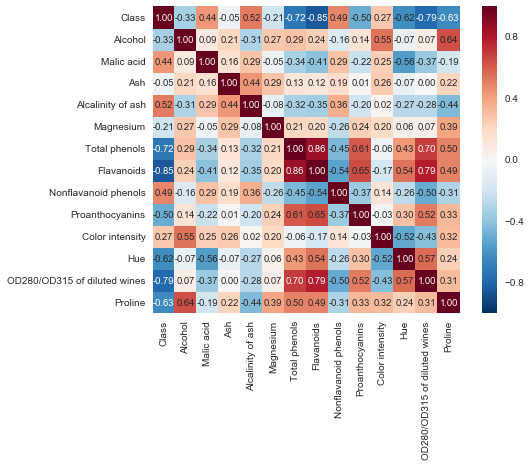

In [52]:
#Just like in the regression assignment I made a heatmap to show the most important features.

df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

cols = df.columns.values
cm = np.corrcoef(df[cols].values, rowvar=0)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 9.5},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

By the above heatmap you can tell that the following features are the most important ones:
    - Alcalinity of ash (0.52)
    - Nonflavanoid phenols (0.49)
    - Malic acid (0.44)
    - Color intensity (0.27)

The rest of the features have a negative (-) correlation with the Label (class).

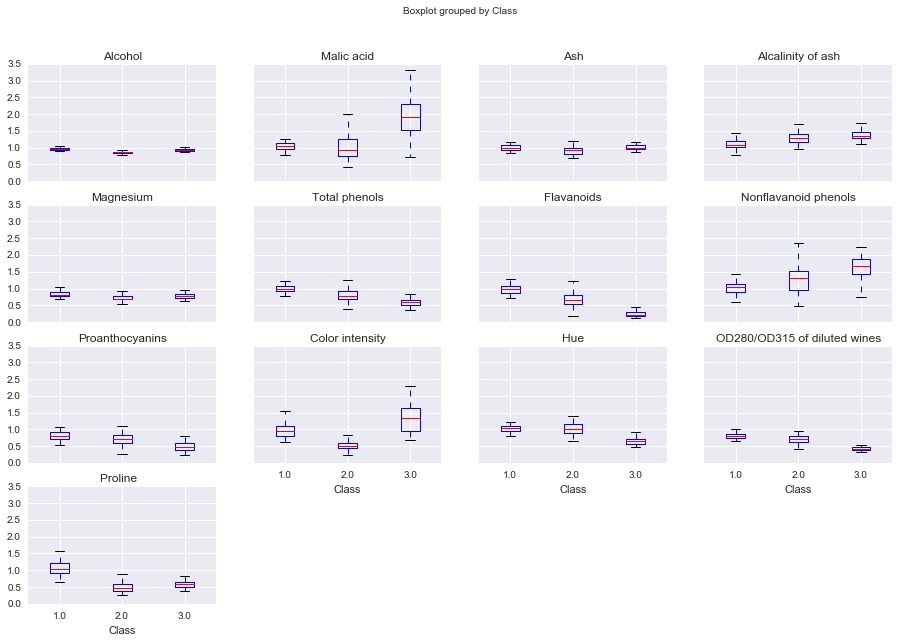

In [18]:
features = tuple(df.columns[1:].values)
df.div(df.loc[0]).boxplot(column=features, by='Class', figsize=(15,10), layout=(4,4));

### K-means

In [56]:
#First I have to seperate the Label (Class) from the features
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

df_X = df[df.columns.tolist()[1::]]
df_y = df['Class']

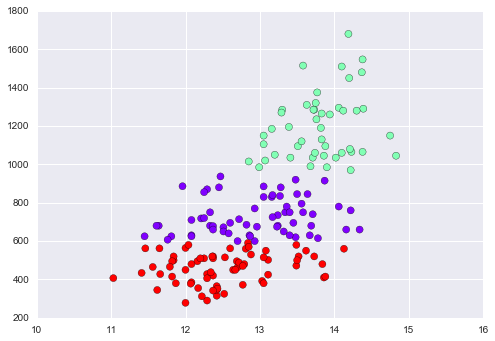

In [67]:
df_X_values = df_X.values
est = KMeans(n_clusters=3,random_state=0)
y_kmeans = est.fit_predict(df_X_values)

plt.scatter(df_X_values[:, 0], df_X_values[:, 12], c=y_kmeans, s=50, cmap='rainbow');

Here you can see the 3 different Labels (classes) clearly. Each class forms a different cluster.

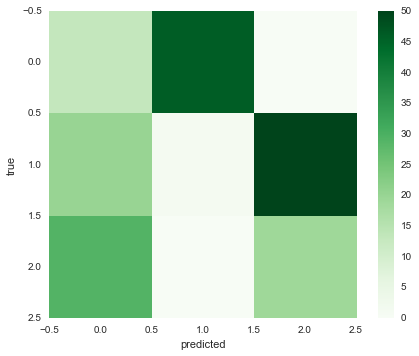

In [71]:
labels = [x+1 for x in est.labels_]
plt.imshow(confusion_matrix(df_y, labels), cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

So, you can see that the prediction goes fairly well. The last label is not as good as the first and second. You can see this by the darkness of the green color. At the last label the green colors are lighter than the other labels.

### Classification

I am going to try some different classification algorithms on the data, based on the exercise we did for the iris data.

In [132]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(133, 13) (133,)


In [133]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
printone = X_train[:5,:]
print(printone)

[[-1.4398785  -0.78560713 -1.38856619  0.34596855 -1.00210036 -0.53447528
  -0.47240981 -0.45138864 -0.08894882 -1.39629181 -0.04852345  0.9522562
  -0.77570686]
 [ 0.62763934 -0.49047417  0.76979701  0.10786341 -0.28975751  0.31991429
   0.53343596 -0.61386412  0.14059224 -0.678359    0.74304589  1.62923379
   0.32696375]
 [ 0.43073288 -1.24566733 -0.10051073 -0.78503083  0.70752249  0.31991429
  -0.77117588  1.57955485 -2.04887627 -0.83840772  0.27741687 -0.98196551
   0.02766744]
 [ 0.88607907  2.84279219  0.21280006  0.25667912 -0.36099179 -1.00050596
  -1.45833785  1.33584163 -0.91882801  1.23307994 -1.49197342 -1.24446703
  -0.00383744]
 [ 0.77531919  2.23516551 -0.13532304  0.10786341 -0.57469465 -0.50340657
  -1.26911933  0.92965293 -0.98945603 -0.2759508  -0.23477506 -0.81617508
  -0.60243005]]


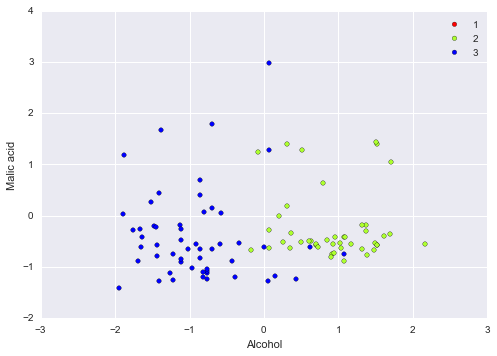

In [134]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['1', '2', '3'])
plt.xlabel(df_X.columns[0])
plt.ylabel(df_X.columns[1]);

Above you see a scatter plot from the data. I tried different train dataset sizes and I discovered that a certain point (train_size = 0.75) the accuracy doesn't get much better.

Also the Label (Class) '1' is not showing in the plot. I don't understand why it is not showing.

In [92]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[ 32.68954919   8.13864177  26.4751114  -25.12986462   7.82150598
    3.97919061  20.75229377  -3.79553855   8.50490094   6.33114297
    0.32695358  13.890657    29.74166516]
 [-41.71245643 -23.0568702  -40.8428654   13.72822745   3.05457168
    4.65022716  28.00166932  27.39468494   0.85687276 -49.96873343
   13.34324063   2.91846755 -39.05097178]
 [ 12.64686179  13.38149597   5.94907441  13.2144948    1.42911467
  -10.35965324 -27.99851938  -1.08286642 -16.95794272  12.60629105
   -7.66426316 -12.67207974  -9.80569857]]
[-40.09685134 -20.60784915 -49.01069437]


In [95]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.955555555556


The accuracy is pretty high!

### Prediction

In [145]:
# First I try to predict the wine Label (class) with K-means
y = est.predict([12.69,1.53,2.26,20.7,80,1.38,1.46,.58,1.62,3.05,.96,2.06,495])
real_class = y[0]
print('This wine belongs to class ' + str(real_class))

This wine belongs to class 2


In [148]:
from sklearn.ensemble import RandomForestClassifier

real_clf = RandomForestClassifier(n_estimators=60, max_features=1, random_state=0)
real_clf = real_clf.fit(df_X, df_y)

y = real_clf.predict([12.69,1.53,2.26,20.7,80,1.38,1.46,.58,1.62,3.05,.96,2.06,495])
print('This wine belongs to class ' + str(y[0]) + '.')

This wine belongs to class 2.


## Case 2 - Heart Disease

**Data Set Information**

A number of attributes are listed that possibly influence heart diseases. The presence of heart disease in the patient is an integer valued from 0 (no presence) to 4. 

The names and social security numbers of the patients were recently removed from the database, and replaced with dummy values. 

One file has been "processed", i.e. the Cleveland database (use this one!). 

See: [UCI Heart Disease](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)
### Question
**Can you predict if a patient has a heart disease based on the patients his or her data?**

In [155]:
df_two = pd.read_csv('processed_cleveland.csv', sep=',', skipinitialspace=True)

df_two.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In case 2 there is a lot more data. So, this is more difficult.
The **Label** in this dataset is the **'num'**; this shows a number from 0 to 4. The number represents a heart disease and 0 represents that a patience has a heart disease.
The data consists of the following features:
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

### The features and description

In [159]:
# Just like in case 1 I grabbed a row to show the features and the label (num)
df_two.loc[244]

age          60
sex           0
cp            3
trestbps    120
chol        178
fbs           1
restecg       0
thalach      96
exang         0
oldpeak       0
slope         1
ca          0.0
thal        3.0
num           0
Name: 244, dtype: object

In [158]:
df_two.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

So you can see that 2 features are objects instead of float64.

** So first I have to fix this problem**

In [163]:
print(df_two[df_two['ca'].str.contains('\?', na=False)])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num  
166      1  ?  3.0    0  
192      2  ?  7.0    1  
287      2  ?  7.0    0  
302      1  ?  3.0    0  


In [165]:
print(str(len(df_two[df_two['ca'].str.contains('\?')].index)))

4


In [166]:
print(str(len(df_two[df_two['thal'].str.contains('\?')].index)))

2


So there is also some unknown data is those 2 features

In [170]:
df_two.replace({'?': 0}, inplace=True)

df_two[['ca', 'thal']] = df_two[['ca', 'thal']].astype(float)

In [173]:
# Here you can see that 'ca' and 'thal' are converted to float64
df_two.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [174]:
# I use the describe function from pandas to get a description of the data.
df_two.describe()

# It is very interesting to see that almost 75% of the patients have a '2' as label and 50% and 25% have a '0'.
# Also the mean of 'num' is just a bit lower than '1'.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [175]:
df_two.shape

(303, 14)

In [176]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 35.5 KB


### Most important features

/Applications/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


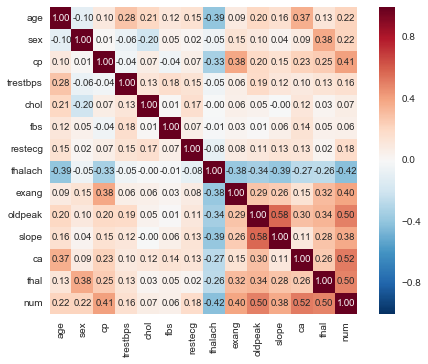

In [177]:
df_two.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

cols = df_two.columns.values
cm = np.corrcoef(df_two[cols].values, rowvar=0)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 9.5},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

In comparison with case 1, you can see that there are more features with a positive correlation. Actually there is just one negative correlation and that is 'thalach' which is the 'maximum heart rate achieved'.

The heighest positive correlation is with 'ca' which is the feature we just converted to float64. It stands for 'number of major vessels (0-3) colored by flourosopy'.

In [181]:
#First I have to seperate the Label (num) from the features
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

df_two_X = df_two[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
df_two_y = df_two['num']

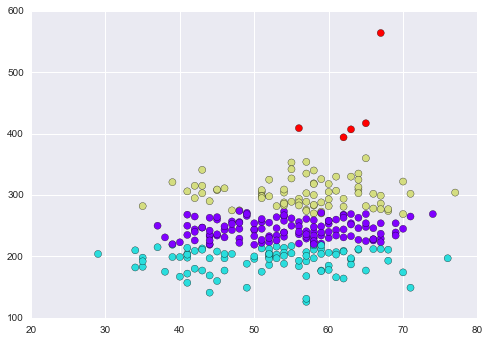

In [184]:
# df_two_X_values = df_two_X.values
# est = KMeans(n_clusters=3,random_state=0)
# y_kmeans = est.fit_predict(df_two_X_values)

# plt.scatter(df_two_X_values[:, 0], df_X_two_values[:, 12], c=y_kmeans, s=50, cmap='rainbow');

df_two_X_values = df_two_X.values
est = KMeans(n_clusters=4)
est.fit(df_two_X_values)
y_kmeans = est.predict(df_two_X_values)

plt.scatter(df_two_X_values[:, 0], df_two_X_values[:, 4], c=y_kmeans, s=50, cmap='rainbow');

In this scatter plot you can see a clear distinction between the heart diseases.

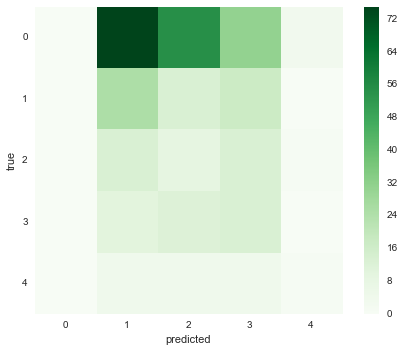

In [185]:
labels = [x+1 for x in est.labels_]
plt.imshow(confusion_matrix(df_two_y, labels), cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

So here you can see the 5 classes and the higher the label (num) the worse the prediction gets.

### Classification

In [207]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_two_X, df_two_y, test_size=0.15, random_state=33)
print(X_train.shape, y_train.shape)

(257, 13) (257,)


In [208]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
printone = X_train[:5,:]
print(printone)

[[ 0.72152598  0.67840053  0.90218231  0.42524274 -0.77881296 -0.44198285
   1.01570249 -0.51277487  1.47405546  0.75770856 -0.93356978  0.38513623
   1.16949907]
 [-2.29453954  0.67840053 -2.18929574 -0.81858678 -1.24839567 -0.44198285
   1.01570249  1.04781497 -0.67840053 -0.88595688 -0.93356978 -0.71464167
  -0.87861855]
 [ 0.16299533 -1.47405546  0.90218231  3.81750508  0.742635    2.26253124
   1.01570249 -0.72952346  1.47405546  2.57439141  2.26546266  1.48491413
   1.16949907]
 [ 2.50882406  0.67840053  0.90218231 -0.42282284  1.04316793 -0.44198285
   1.01570249  0.52761835  1.47405546 -0.88595688 -0.93356978  2.58469203
  -0.87861855]
 [-0.06041693 -1.47405546 -0.12831037 -1.27088842 -0.64732981 -0.44198285
  -0.99226321  0.35421948 -0.67840053  0.49818244  0.66594644 -0.71464167
  -0.87861855]]


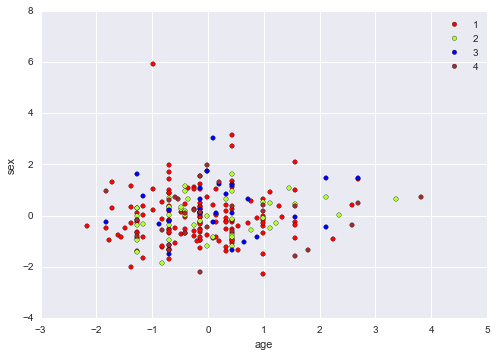

In [222]:
colors = ('red', 'greenyellow', 'blue', 'brown')
for i in range(len(colors)):
    x1s = X_train[:, 3][y_train.as_matrix() == i]
    x2s = X_train[:, 4][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['1', '2', '3', '4'])
plt.xlabel(df_two_X.columns[0])
plt.ylabel(df_two_X.columns[1]);

In [210]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[ -1.95632452 -18.84812599 -13.53536802  10.64413897 -13.24042301
   11.84112999  -4.39572176  14.04500488   9.42406299  -4.54511597
   -7.00313579 -24.07569831 -11.20905006]
 [ 10.53522623  15.87789602   5.07356856  -2.10937149   9.66000169
   -9.90600368  -0.05131193 -14.07749937   2.97022997  -3.31746305
    4.08743334 -11.316515    12.81408135]
 [  8.1297844    0.51337308  24.24428435  -7.07072882  12.20332
   17.64650889 -22.1325446    5.97603215   8.91068991  -0.48339755
   -1.74397156  14.20185161  24.99138398]
 [ -7.17636165 -14.33777677  -4.52934494  16.04759744  -9.48176461
    3.63988042   3.98522635 -11.07840563  -4.51034921  23.07781159
   -2.31621223  10.58581288  -9.57784978]
 [  5.49978392  19.87487215  21.41783266   3.18621045 -22.0581985
  -23.91263215  17.27501549  -1.52354848   8.39731683   8.50219651
    3.51519267  18.7734239    5.14656773]]
[  3.04254348 -31.45256625 -55.3916763  -83.26472764 -75.66578782]


In [212]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


### Prediction

In [214]:
# First I try to predict the wine Label (class) with K-means
y = est.predict([63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0])
real_class = y[0]
print('This patients has been daignosed with: ' + str(real_class))

This patients has been daignosed with: 0


In [216]:
from sklearn.ensemble import RandomForestClassifier

real_clf = RandomForestClassifier(n_estimators=60, max_features=1, random_state=0)
real_clf = real_clf.fit(df_two_X, df_two_y)

y = real_clf.predict([63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0])
print('This patients has been daignosed with: ' + str(y[0]) + '.')

This patients has been daignosed with: 2.


So, you can see that I treid the K-means and the RandomForest.
The patients data I used should give the diagnoses of '2'. K-means failed to do this because the accuracy isn't that high, but RandomForest got it right. It is more precise/accurate in this case then the K-means.

In [223]:
y = real_clf.predict([60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0])
print('This patients has been daignosed with: ' + str(y[0]) + '.')

This patients has been daignosed with: 4.


Once again the RandomForest has got the diagnoses correct.
This patient has a heart disease!

### Goodluck